# How is the City spending it's money?

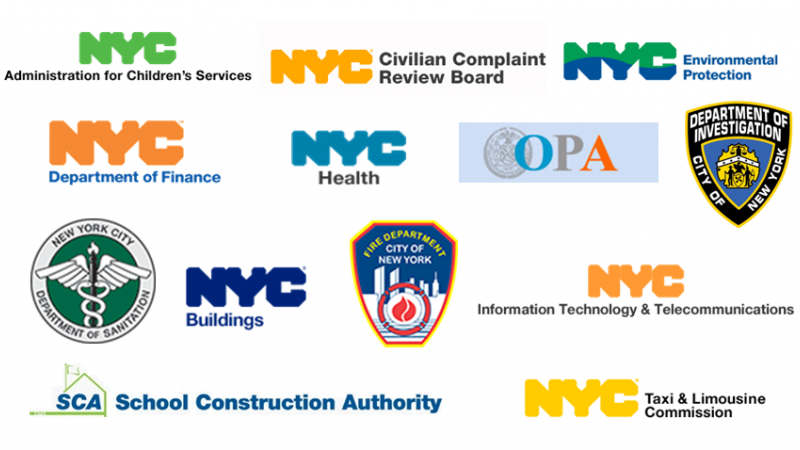

New York City Agencies are constantly spending money on expanding the City, sometimes it is hard to keep track of all of this money. I want to explore the City's Budget and Revenue by analyzing a select few agencies and how the agencies is spending its money through graphs and predictive modeling. This can help predict whether or not the agencies will continue their current spending trend for future construction plans or if they can afford to diversify the leftover budget or revenue.

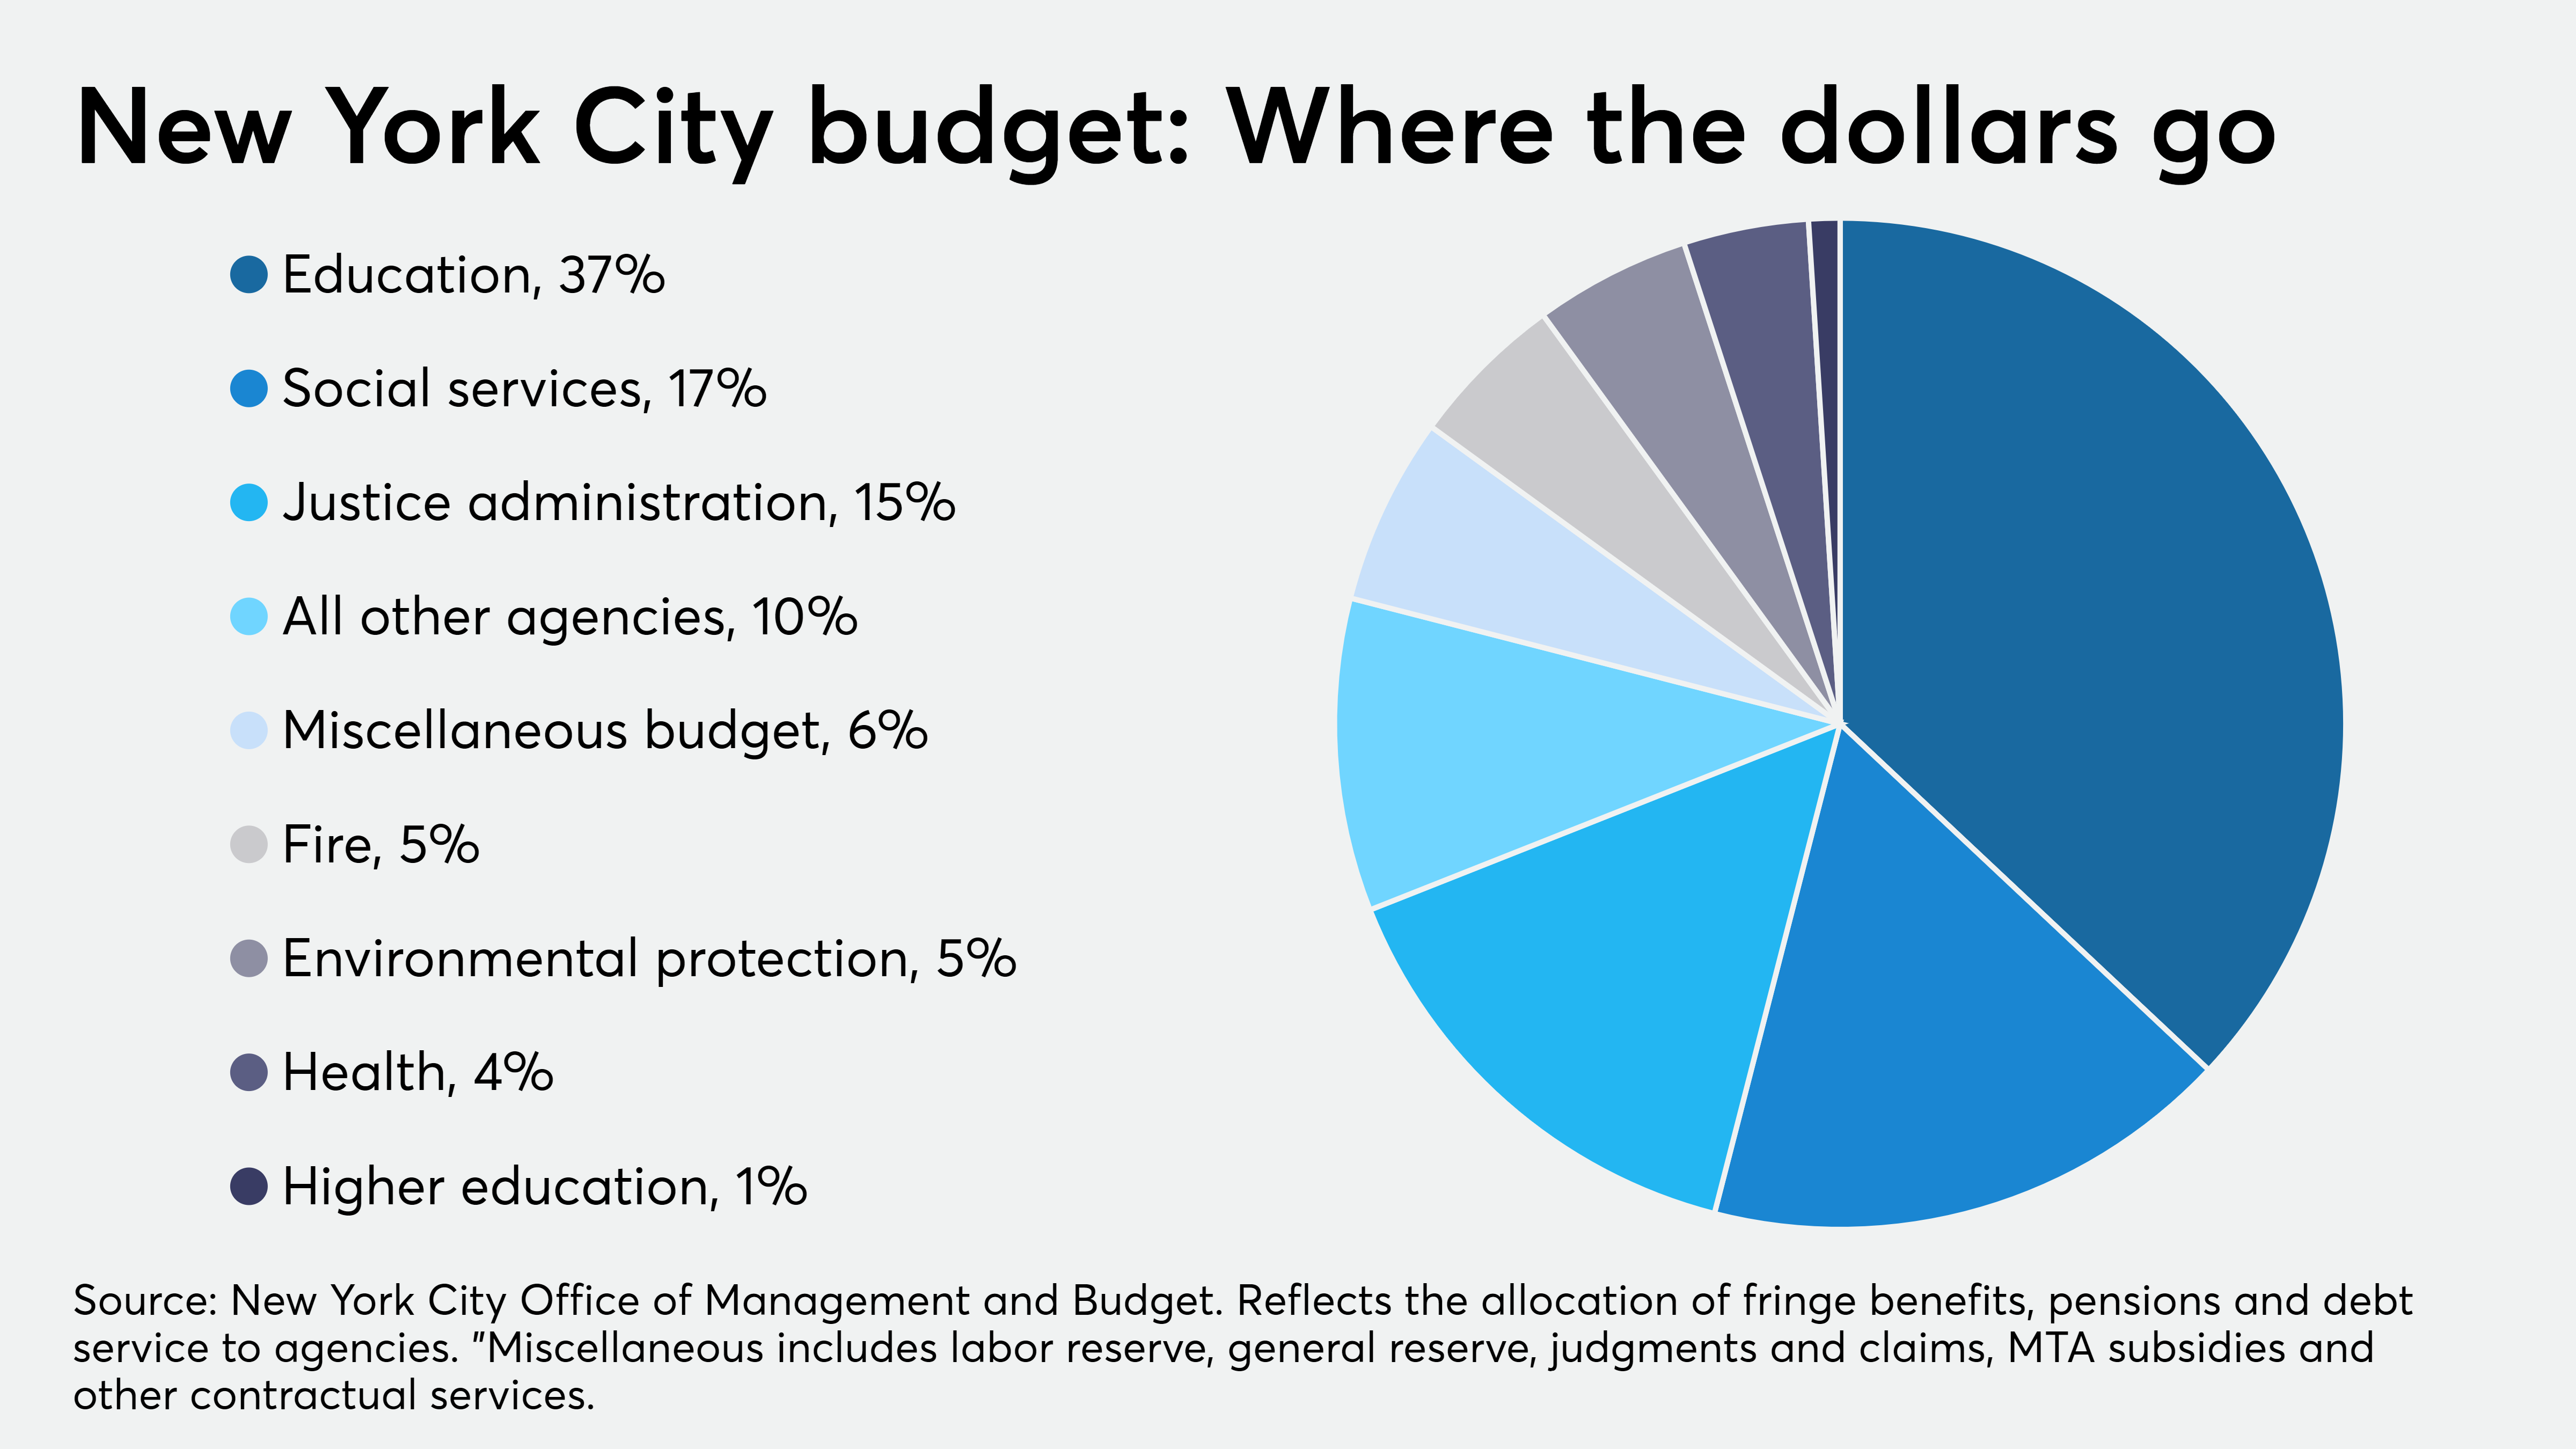

My hypothesis is that I believe that the City is funding the agencies properly and the revenue coming in from those 
agencies are well enough to sustain the agency. 

# Data

The data that I looked at is the New York City Revenue Budget & Financial Plan -- Exec\Adpt\Prel and the New York City Capital Budget

The Revenue Budget & Financial Plan -- Exec\Adpt\Prel can be found here: https://data.cityofnewyork.us/City-Government/Revenue-Budget-Financial-Plan-Exec-Adpt-Prel/ugzk-a6x4
The Capital Budget can be found here: https://data.cityofnewyork.us/City-Government/Capital-Budget/46m8-77gv

# Techniques

I used pandas and numpy for data wrangling, and I also used seaborn and matplotlib to help me plot line graphs and bar graphs. Furthermore I also used sklearn, statsmodels.api, and linear_model from sklearn to help create a regression model to help predict future trends of revenue and budget

# Citations

Resetting index- https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv
Data- https://data.cityofnewyork.us/City-Government/Capital-Budget/46m8-77gv
https://data.cityofnewyork.us/City-Government/Revenue-Budget-Financial-Plan-Exec-Adpt-Prel/ugzk-a6x4
To rotate x-axis on plot- https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot?rq=1
To learn about multiple line charts - https://www.python-graph-gallery.com/122-multiple-lines-chart
To create linear regression and prediction- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
To create a multiple bar chart- https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
To reformat y-axis- https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi

# Import Necessary Libraries

In [230]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

Once the libraries have been imported, we are going to read the csv and filter for 3 specific columns:
Project Type Name, First Fiscal Year, and Fiscal Year 1 Amount
Fiscal Year 1 Amount is the budget amount for the agency (The agencies are named as Project Type Name)

In [231]:
Budgetdf = pd.read_csv(r'/Users/abrarhossain/Desktop/Capital_Budget.csv')

In [232]:
BudgetdfColumns = Budgetdf[['Project Type Name','First Fiscal Year','Fiscal Year 1 Amount']]

Now we want to filter the Project Type Name as "Education" and First Fiscal Year as "2019", as we will later filter for 2020. But for now we also want to create a column called "Total" which is the sum of the Amount for the specific agency. Now we want to create another dataframe with Project Type Name, First Fiscal Year, and Total. Furthermore, we want to reset the index to keep the dataframe clean and organzied. Since all the rows have the same value, we want to set another dataframe to just the first row.

Furthermore, we want to repeat the above process for other agencies like "Fire" and "Queens Borough Public Library", "New York Public Library", and "Brooklyn Public Library".

Once we have 5 new dataframes containing one row each of the Total amount of budget per agency, we want to append those new dataframes and create one new one which will be called "df2019". This dataframe should contain 5 agencies with their respective total amount for their budget.

In [233]:
Education = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'EDUCATION')]
Education2019 = Education[Education['First Fiscal Year'] == 2019]
Education2019['Total'] = Education2019['Fiscal Year 1 Amount'].sum()
Education2 = Education2019[['Project Type Name','First Fiscal Year','Total']]
Education2.reset_index(drop=True, inplace=True)
df2019 = Education2.head(1)
print(df2019)

Fire = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'FIRE')]
Fire2019 = Fire[Fire['First Fiscal Year'] == 2019]
Fire2019['Total'] = Fire2019['Fiscal Year 1 Amount'].sum()
Fire2 = Fire2019[['Project Type Name','First Fiscal Year','Total']]
Fire2.reset_index(drop=True, inplace=True)
FireTotal = Fire2.head(1)
print(FireTotal)

QueensLib = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'QUEENS BOROUGH PUB. LIB.')]
Queens2019 = QueensLib[QueensLib['First Fiscal Year'] == 2019]
Queens2019['Total'] = Queens2019['Fiscal Year 1 Amount'].sum()
Queens2 = Queens2019[['Project Type Name','First Fiscal Year','Total']]
Queens2.reset_index(drop=True, inplace=True)
QueensTotal = Queens2.head(1)
print(QueensTotal)

NYLib = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'NEW YORK PUBLIC LIBRARY')]
NY2019 = NYLib[NYLib['First Fiscal Year'] == 2019]
NY2019['Total'] = NY2019['Fiscal Year 1 Amount'].sum()
NY2 = NY2019[['Project Type Name','First Fiscal Year','Total']]
NY2.reset_index(drop=True, inplace=True)
NYTotal = NY2.head(1)
print(NYTotal)

BrooklynLib = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'BROOKLYN PUBLIC LIBRARY')]
Brooklyn2019 = BrooklynLib[BrooklynLib['First Fiscal Year'] == 2019]
Brooklyn2019['Total'] = Brooklyn2019['Fiscal Year 1 Amount'].sum()
Brooklyn2 = Brooklyn2019[['Project Type Name','First Fiscal Year','Total']]
Brooklyn2.reset_index(drop=True, inplace=True)
BrooklynTotal = Brooklyn2.head(1)
print(BrooklynTotal)

df2019 = df2019.append(FireTotal)
df2019 = df2019.append(QueensTotal)
df2019 = df2019.append(NYTotal)
df2019 = df2019.append(BrooklynTotal)
print(df2019)

  Project Type Name  First Fiscal Year        Total
0         EDUCATION               2019  11708936024
  Project Type Name  First Fiscal Year      Total
0              FIRE               2019  145504568
          Project Type Name  First Fiscal Year     Total
0  QUEENS BOROUGH PUB. LIB.               2019  79105469
         Project Type Name  First Fiscal Year      Total
0  NEW YORK PUBLIC LIBRARY               2019  133340285
         Project Type Name  First Fiscal Year     Total
0  BROOKLYN PUBLIC LIBRARY               2019  28401497
          Project Type Name  First Fiscal Year        Total
0                 EDUCATION               2019  11708936024
0                      FIRE               2019    145504568
0  QUEENS BOROUGH PUB. LIB.               2019     79105469
0   NEW YORK PUBLIC LIBRARY               2019    133340285
0   BROOKLYN PUBLIC LIBRARY               2019     28401497


<ipython-input-233-ee08c064d2a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Education2019['Total'] = Education2019['Fiscal Year 1 Amount'].sum()
<ipython-input-233-ee08c064d2a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fire2019['Total'] = Fire2019['Fiscal Year 1 Amount'].sum()
<ipython-input-233-ee08c064d2a0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [234]:
print(df2019)

          Project Type Name  First Fiscal Year        Total
0                 EDUCATION               2019  11708936024
0                      FIRE               2019    145504568
0  QUEENS BOROUGH PUB. LIB.               2019     79105469
0   NEW YORK PUBLIC LIBRARY               2019    133340285
0   BROOKLYN PUBLIC LIBRARY               2019     28401497


Now we are going to read the second csv and filter for 3 specific columns:
Agency Name, Yr1_FY, Year 1 Revenue Amount
Year 1 Revenue Amount is the revenue amount for the agency (The agencies are named as Agency Name)

In [235]:
df2 = pd.read_csv(r'/Users/abrarhossain/Desktop/Revenue.csv')

In [236]:
prel = df2[['Agency Name','Yr1_FY','Year 1 Revenue Amount']]

Now we want to filter the Agency Name as "Department of Education" and Yr1_FY as "2019", as we will later filter for 2020. But for now we also want to create a column called "Revenue" which is the total revenue for the specific agency. Now we want to create another dataframe with Agency Name, Yr1_FY, and Revenue. Furthermore, we want to reset the index to keep the dataframe clean and organzied. Since all the rows have the same value, we want to set another dataframe to just the first row.

Furthermore, we want to repeat the above process for other agencies like "Fire Department" and "Queens Borough Public Library", "New York Public Library", and "Brooklyn Public Library".

Once we have 5 new dataframes containing one row each of the Total revenue of budget per agency, we want to append those new dataframes and create one new one which will be called "Revdf2019". This dataframe should contain 5 agencies with their respective total amount for their budget.

In [237]:
Doe= prel[prel['Agency Name'] == 'Department of Education']
Doe2019 = Doe[Doe['Yr1_FY'] == 2019]
Doe2019['Revenue'] = Doe2019['Year 1 Revenue Amount'].sum()
Doe2 = Doe2019[['Agency Name','Yr1_FY','Revenue']]
Doe2.reset_index(drop=True, inplace=True)
DoeTotal = Doe2.head(1)

<ipython-input-237-8e3888ab1abe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Doe2019['Revenue'] = Doe2019['Year 1 Revenue Amount'].sum()


In [238]:
Firedep= prel[prel['Agency Name'] == 'Fire Department']
Firedep2019 = Firedep[Firedep['Yr1_FY'] == 2019]
Firedep2019['Revenue'] = Firedep2019['Year 1 Revenue Amount'].sum()
Firedep2 = Firedep2019[['Agency Name','Yr1_FY','Revenue']]
Firedep2.reset_index(drop=True, inplace=True)
FiredepTotal = Firedep2.head(1)
print(FiredepTotal)

Qbpl= prel[prel['Agency Name'] == 'Queens Borough Public Library']
Qbpl2019 = Qbpl[Qbpl['Yr1_FY'] == 2019]
Qbpl2019['Revenue'] = Qbpl2019['Year 1 Revenue Amount'].sum()
Qbpl2 = Qbpl2019[['Agency Name','Yr1_FY','Revenue']]
Qbpl2.reset_index(drop=True, inplace=True)
QbplTotal = Qbpl2.head(1)
print(QbplTotal)

Nypl= prel[prel['Agency Name'] == 'New York Public Library']
Nypl2019 = Nypl[Nypl['Yr1_FY'] == 2019]
Nypl2019['Revenue'] = Nypl2019['Year 1 Revenue Amount'].sum()
Nypl2 = Nypl2019[['Agency Name','Yr1_FY','Revenue']]
Nypl2.reset_index(drop=True, inplace=True)
NyplTotal = Nypl2.head(1)
print(NyplTotal)

Bpl= prel[prel['Agency Name'] == 'Brooklyn Public Library']
Bpl2019 = Bpl[Bpl['Yr1_FY'] == 2019]
Bpl2019['Revenue'] = Bpl2019['Year 1 Revenue Amount'].sum()
Bpl2 = Bpl2019[['Agency Name','Yr1_FY','Revenue']]
Bpl2.reset_index(drop=True, inplace=True)
BplTotal = Bpl2.head(1)
print(BplTotal)

Revdf2019 = DoeTotal
Revdf2019 = Revdf2019.append(FiredepTotal)
Revdf2019 = Revdf2019.append(QbplTotal)
Revdf2019 = Revdf2019.append(NyplTotal)
Revdf2019 = Revdf2019.append(BplTotal)
print(Revdf2019)

       Agency Name  Yr1_FY     Revenue
0  Fire Department    2019  1302541301
                     Agency Name  Yr1_FY  Revenue
0  Queens Borough Public Library    2019  4219685
               Agency Name  Yr1_FY  Revenue
0  New York Public Library    2019  1252328
               Agency Name  Yr1_FY  Revenue
0  Brooklyn Public Library    2019  5522000
                     Agency Name  Yr1_FY      Revenue
0        Department of Education    2019  39951680664
0                Fire Department    2019   1302541301
0  Queens Borough Public Library    2019      4219685
0        New York Public Library    2019      1252328
0        Brooklyn Public Library    2019      5522000


<ipython-input-238-6010140ae1bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Firedep2019['Revenue'] = Firedep2019['Year 1 Revenue Amount'].sum()
<ipython-input-238-6010140ae1bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qbpl2019['Revenue'] = Qbpl2019['Year 1 Revenue Amount'].sum()
<ipython-input-238-6010140ae1bc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [239]:
print(Revdf2019)
print(df2019)

                     Agency Name  Yr1_FY      Revenue
0        Department of Education    2019  39951680664
0                Fire Department    2019   1302541301
0  Queens Borough Public Library    2019      4219685
0        New York Public Library    2019      1252328
0        Brooklyn Public Library    2019      5522000
          Project Type Name  First Fiscal Year        Total
0                 EDUCATION               2019  11708936024
0                      FIRE               2019    145504568
0  QUEENS BOROUGH PUB. LIB.               2019     79105469
0   NEW YORK PUBLIC LIBRARY               2019    133340285
0   BROOKLYN PUBLIC LIBRARY               2019     28401497


As you can see above these are the two dataframes we will work with df2019 and Revdf2019.
Now we must add the Revenue column from the Revdf2019 table to the df2019 table.

In [240]:
df2019['Revenue']= Revdf2019['Revenue']
print(df2019)

          Project Type Name  First Fiscal Year        Total      Revenue
0                 EDUCATION               2019  11708936024  39951680664
0                      FIRE               2019    145504568   1302541301
0  QUEENS BOROUGH PUB. LIB.               2019     79105469      4219685
0   NEW YORK PUBLIC LIBRARY               2019    133340285      1252328
0   BROOKLYN PUBLIC LIBRARY               2019     28401497      5522000


Now we want to filter the original Budget csv again like our first time, with the same process, except this time we will be focusing our attention to 2020 for the Year.

In [241]:
EducationCol = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'EDUCATION')]
Education2020 = EducationCol[EducationCol['First Fiscal Year'] == 2020]
Education2020['Total'] = Education2020['Fiscal Year 1 Amount'].sum()
EducationFuture = Education2020[['Project Type Name','First Fiscal Year','Total']]
EducationFuture.reset_index(drop=True, inplace=True)
df2020 = EducationFuture.head(1)
print(df2020)

FireCol = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'FIRE')]
Fire2020 = FireCol[FireCol['First Fiscal Year'] == 2020]
Fire2020['Total'] = Fire2020['Fiscal Year 1 Amount'].sum()
FireFuture = Fire2020[['Project Type Name','First Fiscal Year','Total']]
FireFuture.reset_index(drop=True, inplace=True)
FireFutureTotal = FireFuture.head(1)
print(FireFutureTotal)

QueensLibCol = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'QUEENS BOROUGH PUB. LIB.')]
Queens2020 = QueensLibCol[QueensLibCol['First Fiscal Year'] == 2020]
Queens2020['Total'] = Queens2020['Fiscal Year 1 Amount'].sum()
QueensFuture = Queens2020[['Project Type Name','First Fiscal Year','Total']]
QueensFuture.reset_index(drop=True, inplace=True)
QueensFutureTotal = QueensFuture.head(1)
print(QueensFutureTotal)

NYLibCol = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'NEW YORK PUBLIC LIBRARY')]
NY2020 = NYLibCol[NYLibCol['First Fiscal Year'] == 2020]
NY2020['Total'] = NY2020['Fiscal Year 1 Amount'].sum()
NYFuture = NY2020[['Project Type Name','First Fiscal Year','Total']]
NYFuture.reset_index(drop=True, inplace=True)
NYFutureTotal = NYFuture.head(1)
print(NYFutureTotal)

BrooklynLibCol = BudgetdfColumns[(BudgetdfColumns['Project Type Name'] == 'BROOKLYN PUBLIC LIBRARY')]
Brooklyn2020 = BrooklynLibCol[BrooklynLibCol['First Fiscal Year'] == 2020]
Brooklyn2020['Total'] = Brooklyn2020['Fiscal Year 1 Amount'].sum()
BrooklynFuture = Brooklyn2020[['Project Type Name','First Fiscal Year','Total']]
BrooklynFuture.reset_index(drop=True, inplace=True)
BrooklynFutureTotal = BrooklynFuture.head(1)
print(BrooklynFutureTotal)

df2020 = df2020.append(FireFutureTotal)
df2020 = df2020.append(QueensFutureTotal)
df2020 = df2020.append(NYFutureTotal)
df2020 = df2020.append(BrooklynFutureTotal)
print(df2020)

  Project Type Name  First Fiscal Year       Total
0         EDUCATION               2020  9902296853
  Project Type Name  First Fiscal Year      Total
0              FIRE               2020  185449336
          Project Type Name  First Fiscal Year     Total
0  QUEENS BOROUGH PUB. LIB.               2020  31241000
         Project Type Name  First Fiscal Year     Total
0  NEW YORK PUBLIC LIBRARY               2020  38427188
         Project Type Name  First Fiscal Year     Total
0  BROOKLYN PUBLIC LIBRARY               2020  19535951
          Project Type Name  First Fiscal Year       Total
0                 EDUCATION               2020  9902296853
0                      FIRE               2020   185449336
0  QUEENS BOROUGH PUB. LIB.               2020    31241000
0   NEW YORK PUBLIC LIBRARY               2020    38427188
0   BROOKLYN PUBLIC LIBRARY               2020    19535951


<ipython-input-241-b113ab0a673a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Education2020['Total'] = Education2020['Fiscal Year 1 Amount'].sum()
<ipython-input-241-b113ab0a673a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fire2020['Total'] = Fire2020['Fiscal Year 1 Amount'].sum()
<ipython-input-241-b113ab0a673a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Now we want to filter the original Revenue csv again like our first time, with the same process, except this time we will be focusing our attention to 2020 for the Year.

In [242]:
DoeCol= prel[prel['Agency Name'] == 'Department of Education']
Doe2020 = DoeCol[DoeCol['Yr1_FY'] == 2020]
Doe2020['Revenue'] = Doe2020['Year 1 Revenue Amount'].sum()
DoeFuture = Doe2020[['Agency Name','Yr1_FY','Revenue']]
DoeFuture.reset_index(drop=True, inplace=True)
DoeFutureTotal = DoeFuture.head(1)

FiredepCol= prel[prel['Agency Name'] == 'Fire Department']
Firedep2020 = FiredepCol[FiredepCol['Yr1_FY'] == 2020]
Firedep2020['Revenue'] = Firedep2020['Year 1 Revenue Amount'].sum()
FiredepFuture = Firedep2020[['Agency Name','Yr1_FY','Revenue']]
FiredepFuture.reset_index(drop=True, inplace=True)
FiredepFutureTotal = FiredepFuture.head(1)
print(FiredepFutureTotal)

QbplCol= prel[prel['Agency Name'] == 'Queens Borough Public Library']
Qbpl2020 = QbplCol[QbplCol['Yr1_FY'] == 2020]
Qbpl2020['Revenue'] = Qbpl2020['Year 1 Revenue Amount'].sum()
QbplFuture = Qbpl2020[['Agency Name','Yr1_FY','Revenue']]
QbplFuture.reset_index(drop=True, inplace=True)
QbplFutureTotal = QbplFuture.head(1)
print(QbplFutureTotal)

NyplCol= prel[prel['Agency Name'] == 'New York Public Library']
Nypl2020 = NyplCol[NyplCol['Yr1_FY'] == 2020]
Nypl2020['Revenue'] = Nypl2020['Year 1 Revenue Amount'].sum()
NyplFuture = Nypl2020[['Agency Name','Yr1_FY','Revenue']]
NyplFuture.reset_index(drop=True, inplace=True)
NyplFutureTotal = NyplFuture.head(1)
print(NyplFutureTotal)

BplCol= prel[prel['Agency Name'] == 'Brooklyn Public Library']
Bpl2020 = BplCol[BplCol['Yr1_FY'] == 2019]
Bpl2020['Revenue'] = Bpl2020['Year 1 Revenue Amount'].sum()
BplFuture = Bpl2020[['Agency Name','Yr1_FY','Revenue']]
BplFuture.reset_index(drop=True, inplace=True)
BplFutureTotal = BplFuture.head(1)
print(BplFutureTotal)

Revdf2020 = DoeFutureTotal
Revdf2020 = Revdf2020.append(FiredepFutureTotal)
Revdf2020 = Revdf2020.append(QbplFutureTotal)
Revdf2020 = Revdf2020.append(NyplFutureTotal)
Revdf2020 = Revdf2020.append(BplFutureTotal)
print(Revdf2020)

df2020['Revenue']= Revdf2020['Revenue']
print(df2020)

       Agency Name  Yr1_FY     Revenue
0  Fire Department    2020  1364252455
                     Agency Name  Yr1_FY  Revenue
0  Queens Borough Public Library    2020  3320591
               Agency Name  Yr1_FY  Revenue
0  New York Public Library    2020  4810278
               Agency Name  Yr1_FY  Revenue
0  Brooklyn Public Library    2019  5522000
                     Agency Name  Yr1_FY      Revenue
0        Department of Education    2020  41830783686
0                Fire Department    2020   1364252455
0  Queens Borough Public Library    2020      3320591
0        New York Public Library    2020      4810278
0        Brooklyn Public Library    2019      5522000
          Project Type Name  First Fiscal Year       Total      Revenue
0                 EDUCATION               2020  9902296853  41830783686
0                      FIRE               2020   185449336   1364252455
0  QUEENS BOROUGH PUB. LIB.               2020    31241000      3320591
0   NEW YORK PUBLIC LIBRARY       

<ipython-input-242-1e9e1af0937a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Doe2020['Revenue'] = Doe2020['Year 1 Revenue Amount'].sum()
<ipython-input-242-1e9e1af0937a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Firedep2020['Revenue'] = Firedep2020['Year 1 Revenue Amount'].sum()
<ipython-input-242-1e9e1af0937a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Here we plot the results from 2019 and we can see that Revenue is blue, while Budget is green. For 2019, we can see that for Queens, New York, and Brooklyn their revenue and budget are the same. Therefore we can conclude that the revenue for the agencies is also their budget and these agencies do not recieve additional funding. On the other hand we can see that the Department of Education and Fire Department agencies both have high flowing revenues, but are receiving less funding.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

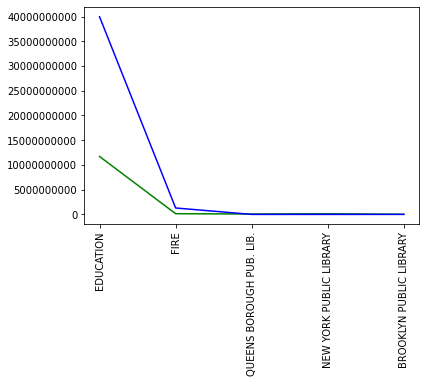

In [243]:
plt.plot('Project Type Name', 'Total', data=df2019, color='green')
plt.plot('Project Type Name', 'Revenue', data=df2019, color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

Here we plot the results from 2020 and we can see that Revenue is green, while Budget is purple. For 2020, just like 2019, we can see that for Queens, New York, and Brooklyn their revenue and budget are the same, and thus the conclusions are the same. The same conclusions can be made about the Department of Education and Fire Department agencies as well. The trends in both 2019 and 2020 appear to be the same.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

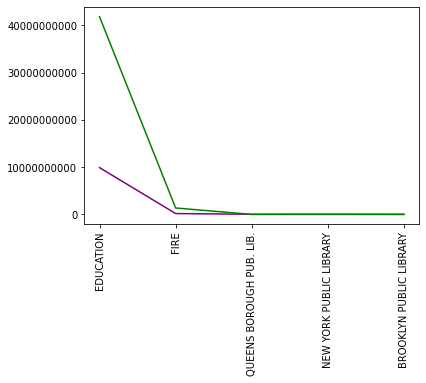

In [244]:
plt.plot('Project Type Name', 'Total', data=df2020, color='purple')
plt.plot('Project Type Name', 'Revenue', data=df2020, color='green')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

Here we are plotting both 2019 and 2020 data onto one graph, 2019 "Total" is olive and "Revenue" is blue. While for 2020 "Total" is purple and "Revenue" is green.

Here you can see that despite the course of the year (from 2019 to 2020), both Department of Education and Fire Department agencies recieved slightly more funding and also produced a slightly higher revenue for the year. But ultimately the funding does not justify the high revenue and low funding.

Also we can see that for Queens, New York, and Brooklyn their revenue and budget are the same despite the year. So, we can confirm our conclusion of the fact that the revenue for the agencies is also their budget and these agencies do not recieve additional funding.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

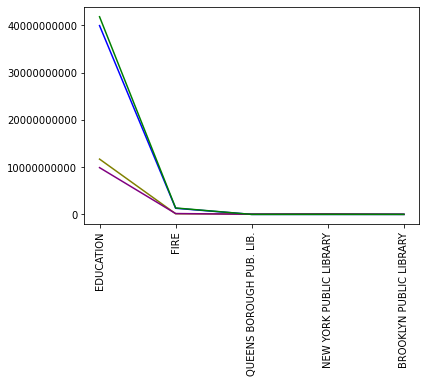

In [245]:
plt.plot('Project Type Name', 'Total', data=df2019, color='olive')
plt.plot('Project Type Name', 'Revenue', data=df2019, color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.plot('Project Type Name', 'Total', data=df2020, color='purple')
plt.plot('Project Type Name', 'Revenue', data=df2020, color='green')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

Just to get a better understanding of the line graphs, we plot the 2019 data in the form of a bar graph. But the results can be hard to read and therefore we will not plot the 2020 data in this method. On the other hand, this does help us identify the extreme Revenue that two agencies are bringing in for the year.

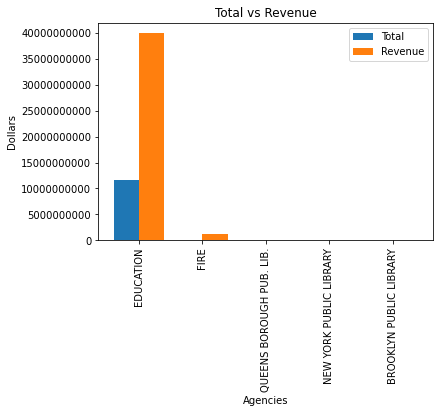

In [248]:
X = df2019['Project Type Name']
Y = df2019['Total']
Z = df2019['Revenue']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Revenue')
  
plt.xticks(X_axis, X)
plt.xlabel("Agencies")
plt.ylabel("Dollars")
plt.title("Total vs Revenue")
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.show()

Here we manipulate our dataframe once again and we remove the "Project Type Name" and now we will create a regression model to help predict future trends of revenue and budget. Here we can see the OLS regression model for 2019

In [249]:
df2019prediction = df2019[['First Fiscal Year','Total', 'Revenue']]

In [250]:
X= df2019prediction
y= df2019prediction['Revenue']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics in a summary
model.summary()

/Users/abrarhossain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.249e+30
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           8.01e-31
Time:                        03:58:00   Log-Likelihood:                 48.721
No. Observations:                   5   AIC:                            -91.44
Df Residuals:                       2   BIC:                            -92.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
First Fiscal Year  2.182e-09    5.6e-09      0.389      0.735   -2.19e-08    2.63e-08
Total             -1.391e-14   7.92e-14     -0.176      0.877   -3.55e-13    3.27e-13
Revenue               1.0000   2.32e-14   4.31e+13      0.000       1.000       1.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.369
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.801
Skew:                           1.467   Prob(JB):                        0.406
Kurtosis:                       3.208   Cond. No.                     1.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we manipulate our dataframe once again, but for 2020 and we remove the "Agency Name" and now we will create a regression model to help predict future trends of revenue and budget. Here we can see the OLS regression model for 2020

In [251]:
df2020prediction = df2020[['First Fiscal Year','Total', 'Revenue']]

In [253]:
X= df2020prediction
y= df2020prediction['Revenue']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics in a summary
model.summary()

/Users/abrarhossain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.136e+31
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           8.81e-32
Time:                        03:58:11   Log-Likelihood:                 54.010
No. Observations:                   5   AIC:                            -102.0
Df Residuals:                       2   BIC:                            -103.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
First Fiscal Year  8.213e-10   1.97e-09      0.417      0.717   -7.65e-09     9.3e-09
Total             -6.755e-14   5.38e-14     -1.256      0.336   -2.99e-13    1.64e-13
Revenue               1.0000   1.27e-14   7.85e+13      0.000       1.000       1.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.071
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.800
Skew:                          -1.466   Prob(JB):                        0.406
Kurtosis:                       3.205   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we will use a linear regression model and predict the R-squared value for 2019 "Total" and "Revenue", as long as 2020 "Total" and "Revenue". 

To which, we will see that the R-squared value is 1.0 for all values

In [254]:
X= df2019prediction
y= df2019prediction['Total']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
lm.score(X,y)

[1.17089360e+10 1.45504568e+08 7.91054690e+07 1.33340285e+08
 2.84014970e+07]


1.0

In [255]:
X= df2019prediction
y= df2019prediction['Revenue']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
lm.score(X,y)


[3.99516807e+10 1.30254130e+09 4.21968500e+06 1.25232800e+06
 5.52200000e+06]


1.0

In [256]:
X= df2020prediction
y= df2020prediction['Total']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
lm.score(X,y)

[9.90229685e+09 1.85449336e+08 3.12410000e+07 3.84271880e+07
 1.95359510e+07]


1.0

In [257]:
X= df2020prediction
y= df2020prediction['Revenue']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
lm.score(X,y)

[4.18307837e+10 1.36425245e+09 3.32059100e+06 4.81027800e+06
 5.52200000e+06]


1.0

In conclusion, since our R-squared value is 1.0, we can predict that in the future Queens, New York, and Brooklyn Public Libraries will receieve the same funding and produce the same revenue. While despite the increase of funding and increased revenue, the Department of Education is an angency where they make more in revenue compared to their funding. This raises the question: where is the rest of that money going? Since New York City and our original csvs have our 50 agencies (data recorded or not), we can not make a conclusive answer to the question. Mainly because we decided to focus on 5 specific agenices. But despite this, we can say that there are agencies that are using their budget to produce the same amount of revenue, to allow for them to sustain themselves and continue to exist. But despite the millions that the Department of Education is making, we can definitely see that New York City has a steady source of money to which they can use to increase the budget for other agencies like the Fire Department, or fund other projects and agencies.